In [1]:
import random
import time
import collections
import matplotlib.pyplot as plt



### Задача 0


In [2]:

def delete_elements_from_array(array, element):
    """
        This function deletes all elements that equal to element from array. 
        
        :param array: Input array
        :type array: list
        :param element: Element that must be deleted from array
        :type element: int
        
        :returns: New array without element with the other elements in the same order
        :rtype: list
    """
    replace_position = 0

    for i, value in enumerate(array):
        if value != element:
            if i != replace_position:
                array[i], array[replace_position] = array[replace_position], array[i]
            replace_position += 1
            

    return array[:replace_position]

In [3]:
N = 100
times = collections.defaultdict(float)

for n in range(3, 18):
    n = 2 ** n
    a = [0] * (n // 3) +[random.randint(1, 5) for _ in range(n - n // 3)]
    for i in range(N):
        random.shuffle(a)
        start = time.time()
        a2 = delete_elements_from_array(a, 0)
        end = time.time()
        assert a2 == [x for x in a if x != 0]
        times[n] += end - start
    times[n] /= N

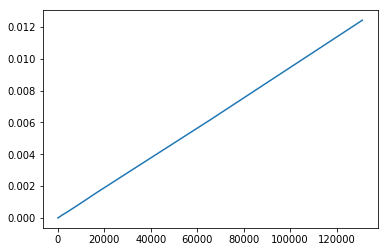

In [4]:
x = [i[0] for i in times.items()]
y = [i[1] for i in times.items()]
plt.plot(x, y);

Как и хотели, линейная зависимость

### Задача 1

In [5]:
def min_complex_number(array):

    min_value = abs(array[0])
    min_complex_value = array[0]
    
    for value in array[1:]:
        if abs(value) < min_value:
            min_value =  abs(value)
            min_complex_value = value
        
    return min_complex_value

In [6]:
n1 = -3 + 1j
n2 = -5 + 1j
n3 = -3 + 1j

min_complex_number([n1, n2, n3])

(-3+1j)

### Задача 2

In [7]:
from itertools import product

In [8]:
class DtypeException(Exception):
    def __init__(self, message):
        pass
        
class FormatException(Exception):
    def __init__(self, message):
        pass

In [9]:
from functools import lru_cache
from itertools import permutations

class ATM:
    def __init__(self):
        pass
    
    @lru_cache(maxsize=128)
    def fib(self, n):
        n = int(n)
        a = 0
        b = 1
        for _ in range(n):
            a, b = b, a + b
        return str(a)
    
    
    @lru_cache(maxsize=64)
    def gcd(self, a, b):
        while a != 0 and b != 0:
            if a > b:
                a %= b
            else:
                b %= a
        return a + b
    
    
    def array2int(self, array):
        return int(''.join(array))

    
    def divide_number(self, x, n_parts = 4):      
        step = len(x) // n_parts
        parts = [x[step*i:step*(i+1)] for i in range(n_parts)]
        parts = sorted(parts)

        if len(parts)*step != len(x):
            raise FormatException('Incorrect card number')
        
        return parts
    
    
    def check_divide_card_number(self, x, n_parts = 4):    
        
        if not x.replace(' ', '').isdigit():
            raise FormatException('Incorrect card number') 
            
        li = x.split(' ')
            
        if len(li) not in [1, n_parts]:
            raise FormatException('Incorrect card number')
        
        if not all([len(x) == len(li[0]) for y in li]):
            raise FormatException('Incorrect card number')
        
        return sorted(li)
    
    
    def _sort_list(self, li):
    
        if len(li) <= 1:
            return li

        i = 0
        a = li[i]
        j = len(li) - 1

        while i < j:

            if li[i+1] > a:
                li[j], li[i+1] = li[i+1], li[j]
                j = j - 1

            else:
                i += 1

        return self._sort_list(li[1:i+1]) + li[:1] + self._sort_list(li[j+1:])
    
    
    def calculate_median(self, li):
        
        sorted_array = self._sort_list(li)
        n = len(sorted_array)
        
        if n % 2 == 1:
            return sorted_array[(n // 2) + 1]
        else:
            return (sorted_array[(n // 2)] + sorted_array[(n // 2)+1]) / 2
    
    
    def return_median(self, card_number, password):
        """
            Parameters
            --------
            card_number: str
                card_number should consists of four parts of digits of equal length. 
                Parts may be separated by a space
                
                example: '1 2 3 4', '0000'
            password: int
            
            Returns
            --------
            m: int
                Median of greatest common divisor and password 
                between all permutations
        """
        
        if not isinstance(card_number, str):
            raise DtypeException('card_number must be str')
            
        four_numbers = self.check_divide_card_number(card_number)
            
        if not isinstance(password, int) or password < 0:
            raise DtypeException('Password must be positive integer')
        
        if len(four_numbers) != 4:
            four_numbers = self.divide_number(four_numbers[0])
            
        fibonacci = [self.fib(x) for x in four_numbers]
        gcds = []

        for value in permutations(fibonacci):
            value = self.array2int(value)
            gcd_number = self.gcd(value, password)
            gcds.append(gcd_number)

        return self.calculate_median(gcds)
 
        

In [10]:
card1 = '0011'
card2 = '12345679'
card3 = '12345678'


In [11]:
atm = ATM()

In [12]:
%time atm.return_median(card3, 3)

CPU times: user 86 µs, sys: 0 ns, total: 86 µs
Wall time: 88.5 µs


3.0

In [14]:
%time atm.return_median(card2, 3)

CPU times: user 82 µs, sys: 0 ns, total: 82 µs
Wall time: 83.4 µs


1.0

### Задача 3

Рассмотрим скорость работы при вставке и удалении элементов справа и слева для **list** и **deque**

In [16]:
from collections import deque


В **list** вставка элемента в конец или удаление элемента справа имеет сложность O(1).

При добавлении или удалении элемента из **list**, все последующие элементы придется передвинуть, поэтому в худшем случае мы передвинем n эллементов. И сложность добавления элемента в начало станет O(n).

**deque** - это структура, объединяющая стек и очередь, которая поддерживает операции добавления в конец и в начало (элементы не передвигаются). Поэтому при добавлении или удалении элемента из начала массива сложность останется O(1). Но у **deque** плохая производительность, O(n), при добавлении элементов в середину массива.

In [1]:
import timeit
import time
import matplotlib.pyplot as plt
import sys

In [2]:
from collections import deque

In [3]:
def calc_statistic(n, obj, method, args):
    times = []
    memory = []
    for i in range (100):
        li = obj([0]*n)
        t_start = time.time()
        method(li, *args)
        t_end = time.time()
        times.append(t_end - t_start)
        memory.append(sys.getsizeof(li))
        
    times = sorted(times)
    
    return {'times' : [times[int(0.25*len(times))], 
                       sum(times) / len(times), 
                       times[int(0.75*len(times))]],
            
            'memory': [memory[int(0.25*len(memory))],
                       sum(memory) / len(memory),
                       memory[int(0.75*len(memory))]]}

In [4]:
def calc_time(obj, method, args):
    N = 30000
    step = 300
    
    times25 = []
    times50 = []
    times75 = []
    
    mem25 = []
    mem50 = []
    mem75 = []
    
    
    for i in range(300, N, step):
        
        statistics = calc_statistic(i, obj, method, args)
        
        times25.append(statistics['times'][0])
        times50.append(statistics['times'][1])
        times75.append(statistics['times'][2])
        
        mem25.append(statistics['memory'][0])
        mem50.append(statistics['memory'][1])
        mem75.append(statistics['memory'][2])


    return [times25, times50, times75], [mem25, mem50, mem75]

In [5]:
def plot_graph(list_times, deq_time, list_mem, deq_mem, title):
    
    fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(12, 5))

    ax1.plot(range(300, 30000, 300), list_times[1], label = 'list5')
    ax1.plot(range(300, 30000, 300), deq_time[1], label = 'deque50')
    ax1.legend()
    ax1.set_xlabel('n')
    ax1.set_title('Time_'+title)

    ax2.plot(range(300, 30000, 300), list_mem[1], label = 'list5')
    ax2.plot(range(300, 30000, 300), deq_mem[1], label = 'deque50')
    ax2.legend()
    ax2.set_xlabel('n')
    ax2.set_title('Memory_'+title);

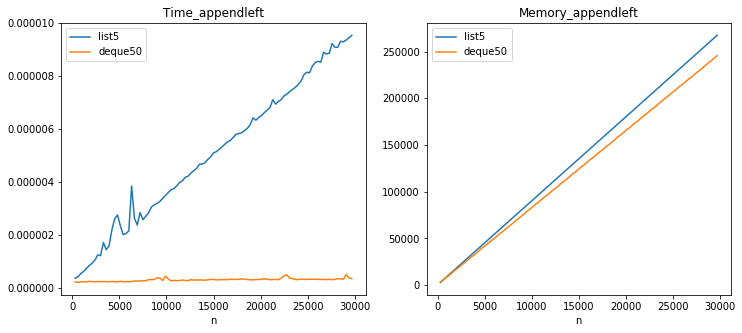

In [6]:
list_times,  list_mem = calc_time(list, list.insert, [0, 0])
deq_time, deq_mem = calc_time(deque, deque.appendleft, [0])
plot_graph(list_times, deq_time, list_mem, deq_mem, 'appendleft')

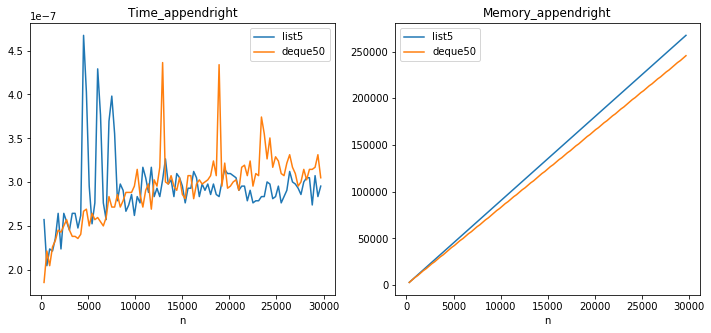

In [15]:
list_times,  list_mem = calc_time(list, list.append, [0])
deq_time, deq_mem = calc_time(deque, deque.append, [0])
plot_graph(list_times, deq_time, list_mem, deq_mem, 'appendright')

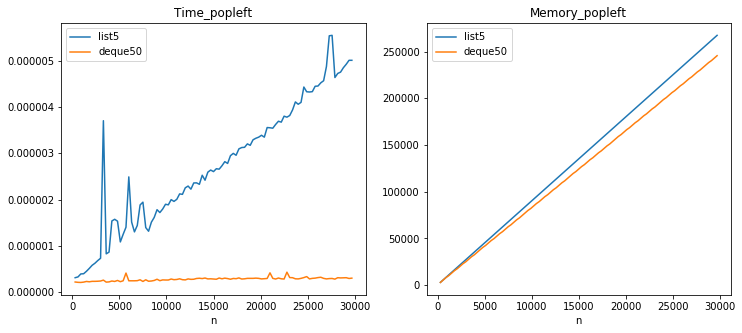

In [16]:
list_times,  list_mem = calc_time(list, list.pop, [0])
deq_time, deq_mem = calc_time(deque, deque.popleft, [])
plot_graph(list_times, deq_time, list_mem, deq_mem, 'popleft')

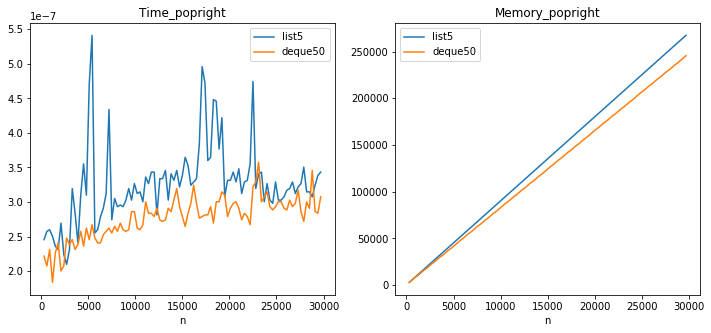

In [17]:
list_times,  list_mem = calc_time(list, list.pop, [])
deq_time, deq_mem = calc_time(deque, deque.pop, [])
plot_graph(list_times, deq_time, list_mem, deq_mem, 'popright')

При добавлении/удалении элемента справа list и deque имеют похожее потребление времени и памяти.

При добавлении элемента слева, время у листа возрастает, т.к. ему не отведены ячейки слева. Отведенная память остается похожей

### Задача 4

Проводим эксперимент для исходного массива разной длины

Для сравнения времени, считаем среднее значение по 5 запускам.

Для сравнения по памяти используем максимальное значение потребленной памяти с помощью библиотеки memory_usage

In [18]:
from itertools import permutations
from memory_profiler import memory_usage

import random
import time

Делаем перестановки через рекурсию

In [19]:
def my_permutations(iterable, tail=[], result = []):
    iterable = tuple(iterable)
    if len(iterable) == 0: result.append(tail)
    else:
        for i in range(len(iterable)):
            a = my_permutations(iterable[0:i] + iterable[i+1:], tail+[iterable[i]], result)
    return result

ВРЕМЯ

In [20]:
def calculate_time(li, method):
    t = []
    for i in range(5):
        if method == 'my':
            t_start = time.time()
            my_permutations(li)
            t.append(time.time()-t_start)
        elif method == 'collection':
            t_start = time.time()
            list(permutations(li))
            t.append(time.time()-t_start)
    return sum(t)/5

In [21]:
N = 11
step = 1

times_my = []
times_iter = []

for i in range(1, N, step):
    li = [random.randint(0, 10) for _ in range(i)]
    
    t_my = calculate_time(li, 'my')
    t_collection = calculate_time(li, 'collection')
    
    times_my.append(t_my) 
    times_iter.append(t_collection) 
        

Text(0.5, 1.0, 'time')

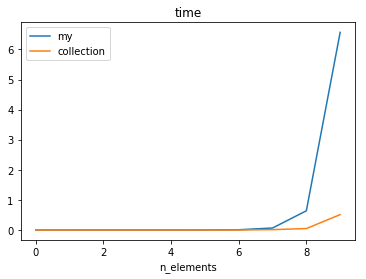

In [22]:
plt.plot(times_my, label = 'my')
plt.plot(times_iter, label = 'collection')
plt.xlabel('n_elements')
plt.legend()
plt.title('time')

ПАМЯТЬ

In [23]:
def calculate_memory(li, method):
    memories = []
    
    if method == 'my':
        f = lambda : my_permutations(li)
    elif method == 'collection':
        f = lambda : permutations(li)
        
    for i in range(5):
        mem_usage = max(memory_usage(f))
        memories.append(mem_usage)

    return sum(memories)/5

In [24]:
N = 11
step = 1

mem_my = []
mem_iter = []

for i in range(1, N, step):
    li = [random.randint(0, 10) for _ in range(i)]
    
    m_my = calculate_memory(li, 'my')
    m_collection = calculate_memory(li, 'collection')
    
    mem_my.append(m_my) 
    mem_iter.append(m_collection) 
    
    

Text(0.5, 1.0, 'memory')

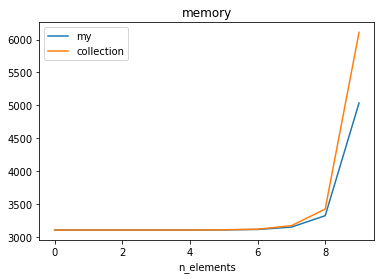

In [25]:
plt.plot(mem_my, label = 'my')
plt.plot(mem_iter, label = 'collection')
plt.xlabel('n_elements')
plt.legend()
plt.title('memory')